In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("mail_data.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
df.shape

(5572, 2)

In [6]:
#Label Encoding | Labelling spam mail as 0 and ham mail as 1
df.loc[df["Category"]=="spam","Category"]=0
df.loc[df["Category"]=="ham","Category"]=1

In [7]:
print('Spam', round(df['Category'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Ham', round(df['Category'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Spam 13.41 % of the dataset
Ham 86.59 % of the dataset


In [8]:
x=df["Message"]
y=df["Category"]

Text(0.5, 1.0, 'Class Distributions \n (0: spam|| 1: ham)')

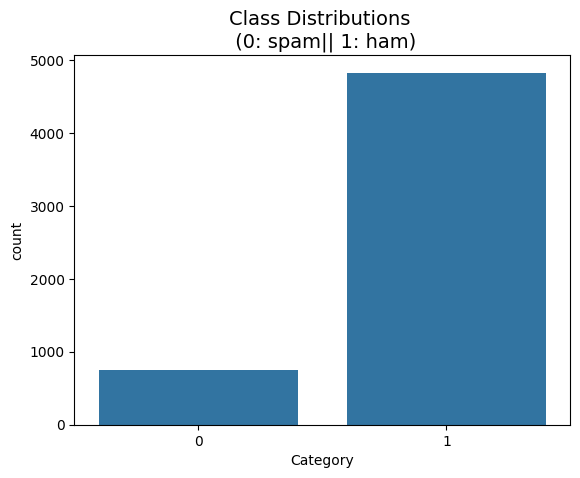

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Category',data =df)
plt.title('Class Distributions \n (0: spam|| 1: ham)', fontsize=14)

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=34,stratify=y)

In [11]:
ytrain.value_counts()

Category
1    3859
0     598
Name: count, dtype: int64

In [12]:
#converting text data into feature vectors so it can be passed into the model
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)
x_train=feature_extraction.fit_transform(xtrain)
x_test=feature_extraction.transform(xtest)

In [13]:
ytrain=ytrain.astype("int")
ytest=ytest.astype("int")

In [23]:
#here the problem of class imbalance is present so it can be rectified by using smote
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=28)
x_train,ytrain=smote.fit_resample(x_train,ytrain)
x_test,ytest=smote.fit_resample(x_test,ytest)

In [24]:
ytrain.value_counts()

Category
1    3859
0    3859
Name: count, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
models={
    'logistic Regression' :LogisticRegression(),
    'SVC':SVC(),
    'KNN':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier()    
     }

for name,md in models.items():
    print(name)
    md.fit(x_train,ytrain)
    y_pred=md.predict(x_test)
    print(f"accuracy_score : {accuracy_score(ytest,y_pred)} \n")
    print(f"confusion matrix: {confusion_matrix(ytest,y_pred)}\n")
    print(f"classification report : {classification_report(ytest,y_pred)}\n")
    print('__'*50)

logistic Regression
accuracy_score : 0.9296066252587992 

confusion matrix: [[839 127]
 [  9 957]]

classification report :               precision    recall  f1-score   support

           0       0.99      0.87      0.93       966
           1       0.88      0.99      0.93       966

    accuracy                           0.93      1932
   macro avg       0.94      0.93      0.93      1932
weighted avg       0.94      0.93      0.93      1932


____________________________________________________________________________________________________
SVC
accuracy_score : 0.9425465838509317 

confusion matrix: [[857 109]
 [  2 964]]

classification report :               precision    recall  f1-score   support

           0       1.00      0.89      0.94       966
           1       0.90      1.00      0.95       966

    accuracy                           0.94      1932
   macro avg       0.95      0.94      0.94      1932
weighted avg       0.95      0.94      0.94      1932


___________

In [28]:
model=DecisionTreeClassifier()
m1=model.fit(x_train,ytrain)
ypred=m1.predict(x_test)
print("Accuracy score: ",accuracy_score(ytest,ypred))

Accuracy score:  0.9528985507246377


In [29]:
mail=["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
mail=feature_extraction.transform(mail)
pred=m1.predict(mail)


if pred==[1]:
    print("Not a Spam Mail")
else:
    print("Spam Mail")

Not a Spam Mail


In [30]:
import pickle 
pickle.dump(m1,open("m1.pkl","wb"))
pickle.dump(feature_extraction,open("feature_extraction.pkl","wb"))